<a href="https://colab.research.google.com/github/VaniM16/S3-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [ ]:
x_train/=255
x_valid/=255


In [ ]:
from keras import utils as np_utils
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=150,verbose=1)

Epoch 1/150
469/469 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.0699
Epoch 2/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.0904
Epoch 3/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0910 - accuracy: 0.1120
Epoch 4/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0906 - accuracy: 0.1425
Epoch 5/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.1768
Epoch 6/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.2097
Epoch 7/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0895 - accuracy: 0.2390
Epoch 8/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.2623
Epoch 9/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.2806
Epoch 10/150
469/469 [==============================] - 1s 3ms/step - loss: 0.0887 - accura

In [ ]:
x_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
from sklearn.metrics import confusion_matrix


x_valid =x_valid.reshape(x_valid.shape[1:])
#X = X.reshape(X.shape[1:]) 

test_predictions = model.predict(x_valid)

# Compute confusion matrix
confusion =confusion_matrix(y_valid, test_predictions)

ValueError: ignored

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, Y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_valid, Y_train,Y_valid = train_test_split(X, Y, stratify=Y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

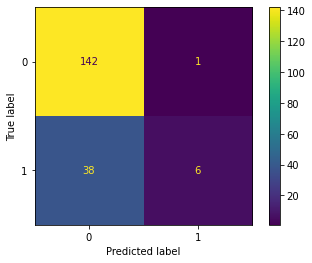

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()